In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

### Задание 1

In [85]:
from sklearn.datasets import load_boston
boston = load_boston()
data = boston.data
target = boston.target
feature_names = boston.feature_names

Создание датафреймов

In [86]:
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=['price'])

Разбиение данных на тренировочный и тестовый датасеты

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Масштабирование данных с помощью StandardScaler.

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

t-SNE

In [89]:
from sklearn.manifold import TSNE

In [90]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=100)

In [91]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

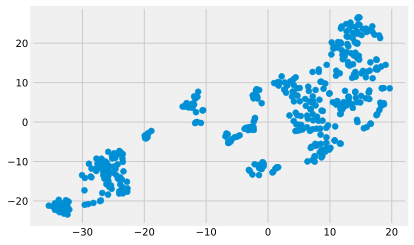

In [92]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

### Задание 2

In [93]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=42, max_iter=100)

In [94]:
X_train_labels = model.fit_predict(X_train_scaled)

In [95]:
X_train_labels

array([1, 2, 0, 1, 2, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 1, 2,
       0, 2, 0, 2, 1, 0, 2, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 2, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0,
       1, 2, 2, 1, 1, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2,
       1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 2, 1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 2,
       2, 2, 2, 1, 2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 2,
       0, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0,
       1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 0, 1, 2, 1,
       1, 1, 1, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0,
       0, 1, 1, 2, 0, 1, 1, 2, 0, 0, 1, 2, 0, 1, 2, 2, 1, 2, 1, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 0, 2, 1, 1, 0, 1, 2, 1, 2, 2,
       1, 0, 0, 2, 1, 0, 1, 1, 1, 2, 0, 1, 2, 2, 2,

In [96]:
model.cluster_centers_

array([[-0.39886419,  1.55761113, -1.01661835, -0.09789972, -1.11157102,
         0.4694394 , -1.31625943,  1.43008074, -0.59047541, -0.58513831,
        -0.60269912,  0.35449756, -0.82802167],
       [ 0.81090356, -0.50032012,  1.12900228,  0.08796453,  1.14538259,
        -0.49660815,  0.77912417, -0.85778857,  1.2424768 ,  1.31237242,
         0.60373924, -0.65731177,  0.90021762],
       [-0.35959388, -0.36865917, -0.29295347, -0.014409  , -0.26109152,
         0.1188348 ,  0.07460493, -0.07354866, -0.56028098, -0.60915918,
        -0.1300668 ,  0.277444  , -0.22574751]])

График t-SNE с известными лейблами

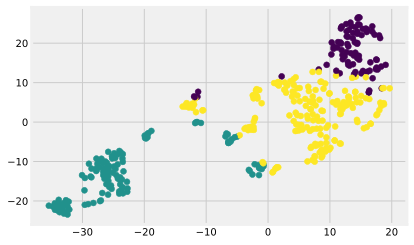

In [97]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=X_train_labels)

Вычисление средних значений price и CRIM в разных кластерах.

In [98]:
y_train[X_train_labels==0].mean()

price    27.788372
dtype: float64

In [99]:
y_train[X_train_labels==1].mean()

price    16.165354
dtype: float64

In [100]:
y_train[X_train_labels==2].mean()

price    24.958115
dtype: float64

In [101]:
X_train.loc[X_train_labels==0, 'CRIM'].mean()

0.07356558139534886

In [102]:
X_train.loc[X_train_labels==1, 'CRIM'].mean()

10.797028425196853

In [103]:
X_train.loc[X_train_labels==2, 'CRIM'].mean()

0.42166020942408367

### Задание 3

In [104]:
X_test_labels = model.fit_predict(X_test_scaled)

In [106]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

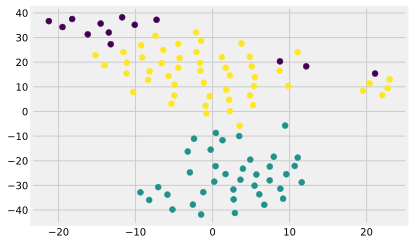

In [107]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=X_test_labels)

Вычисление средних значений price и CRIM в разных кластерах на тестовых данных
.

In [108]:
y_test[X_test_labels==0].mean()

price    34.553846
dtype: float64

In [109]:
y_test[X_test_labels==1].mean()

price    16.710526
dtype: float64

In [110]:
y_test[X_test_labels==2].mean()

price    21.717647
dtype: float64

In [111]:
X_test.loc[X_test_labels==0, 'CRIM'].mean()

0.08308461538461537

In [112]:
X_test.loc[X_test_labels==1, 'CRIM'].mean()

9.419181842105264

In [113]:
X_test.loc[X_test_labels==2, 'CRIM'].mean()

0.22250117647058823